# HW8 Part 2: Urban Data VIsualization

Author: Zoe Martiniak (zem232), NYU

In [1]:
import requests
import os
import sys
import urllib
import pandas as pd
import numpy as np
import geopandas as gp
import pylab as pl
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/zoemartiniak/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
url ='https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?accessType=DOWNLOAD'
filename='NYCbusinesses.csv'
urllib.request.urlretrieve(url, filename)


('NYCbusinesses.csv', <http.client.HTTPMessage at 0x11169bbe0>)

In [5]:
url2='https://data.cityofnewyork.us/api/views/6bic-qvek/rows.csv?accessType=DOWNLOAD'
urllib.request.urlretrieve(url2, 'DemographicsbyZIP.csv')


('DemographicsbyZIP.csv', <http.client.HTTPMessage at 0x11a1387f0>)

In [34]:
#!mv DemographicsbyZIP.csv $PUIDATA
zipdemo=pd.read_csv(os.getenv('PUIDATA')+ "/" + 'DemographicsbyZIP.csv')

In [37]:
cols_to_drop = [i for i in zipdemo.columns.values if i !='JURISDICTION NAME' and i !='COUNT PARTICIPANTS' and i != 'COUNT RECEIVES PUBLIC ASSISTANCE' and i != 'PERCENT RECEIVES PUBLIC ASSISTANCE' and i != 'COUNT NRECEIVES PUBLIC ASSISTANCE'and i !='PERCENT NRECEIVES PUBLIC ASSISTANCE' and i !='COUNT PUBLIC ASSISTANCE UNKNOWN' and i !='PERCENT PUBLIC ASSISTANCE UNKNOWN']
zipdemo.drop(cols_to_drop,axis=1,inplace=True)
zips=zips[zips['COUNT PARTICIPANTS']>0]
zipdemo.rename({'JURISDICTION NAME':'ZIPCODE'},axis=1,inplace=True)

In [25]:
!mv NYCbusinesses.csv $PUIDATA
nycbiz=pd.read_csv(os.getenv('PUIDATA')+ "/" + 'NYCbusinesses.csv')

/Users/zoemartiniak/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
nycbiz.drop(['DCA License Number', 'License Type', 'License Expiration Date', 'License Creation Date', 'Address Building', 'Address Street Name', 'Secondary Address Street Name', 'Address City', 'Address State', 'Contact Phone Number', 'Borough Code', 'BIN', 'BBL'], axis=1, inplace=True)
nycbiz = nycbiz[nycbiz['Longitude'] <0]
nycbiz.head()

,License Status,Industry,Business Name,Business Name 2,Address ZIP,Address Borough,Community Board,Council District,NTA,Census Tract,Detail,Longitude,Latitude,Location
2,Active,Home Improvement Contractor,"JUNIOR'S IRONWORK & CONSTRUCTION, INC.",NaN,11433,Queens,412.0,27.0,QN61,444.0,NaN,-73.788915,40.703297,"(40.70329689832498, -73.78891454010119)"
6,Active,Laundries,KANG LE LAUNDROMAT INC,NaN,11234,Brooklyn,318.0,45.0,BK58,650.0,Sub-License Type: Retail Laundry,-73.932940,40.619039,"(40.61903874185033, -73.93294011345556)"
13,Active,Home Improvement Contractor,MKINNOVATION CONSTRUCTION LLC,NaN,10306,Staten Island,502.0,50.0,SI45,11202.0,NaN,-74.094751,40.569830,"(40.569829685193596, -74.09475125855013)"
14,Active,Home Improvement Contractor,"FLYNN CONTRACTING, LTD.",NaN,10312,Staten Island,503.0,51.0,SI48,17009.0,NaN,-74.184602,40.544290,"(40.544289728674975, -74.18460160893913)"
16,Active,Tobacco Retail Dealer,NEW STAR TOBACCO INC.,NaN,11220,Brooklyn,307.0,38.0,BK32,80.0,NaN,-74.007600,40.647730,"(40.647730104866746, -74.00760004860872)"


In [27]:
nycbiz['Business Name'].dropna(inplace=True)

In [28]:
affkeys = np.array(list(nycbiz['Business Name'].keys())).astype(int)

In [44]:
d=[(k, nycbiz['Address ZIP'][k],nycbiz['NTA'][k]) for k in affkeys if 'DELI' in nycbiz['Business Name'][k] or 'BODEGA' in nycbiz['Business Name'][k]]

In [45]:
g=[(k, nycbiz['Address ZIP'][k],nycbiz['NTA'][k]) for k in affkeys if 'GROCER' in nycbiz['Business Name'][k] or 'FOOD' in nycbiz['Business Name'][k] or 'PRODUCE' in nycbiz['Business Name'][k]]

In [63]:
delibiz= pd.DataFrame(d)
delibiz[1]=delibiz[1].astype(int)
delibiz.rename(columns={0:'DELI',1:'ZIPCODE',2:'NTA'}, inplace=True)
delicount=delibiz.groupby(['ZIPCODE'])['DELI'].count().reset_index()

In [64]:
grocerybiz= pd.DataFrame(g)
grocerybiz[1]=grocerybiz[1].astype(int)
grocerybiz.rename(columns={0:'GROCERY',1:'ZIPCODE',2:'NTA'}, inplace=True)
grocerycount=grocerybiz.groupby(['ZIPCODE'])['GROCERY'].count().reset_index()

In [136]:
merged=grocerycount.merge(delicount, on='ZIPCODE')
# Extracting only the Brooklyn Zip Codes
merged=merged[merged['ZIPCODE'] <11300]
merged=merged[merged['ZIPCODE']>11200]

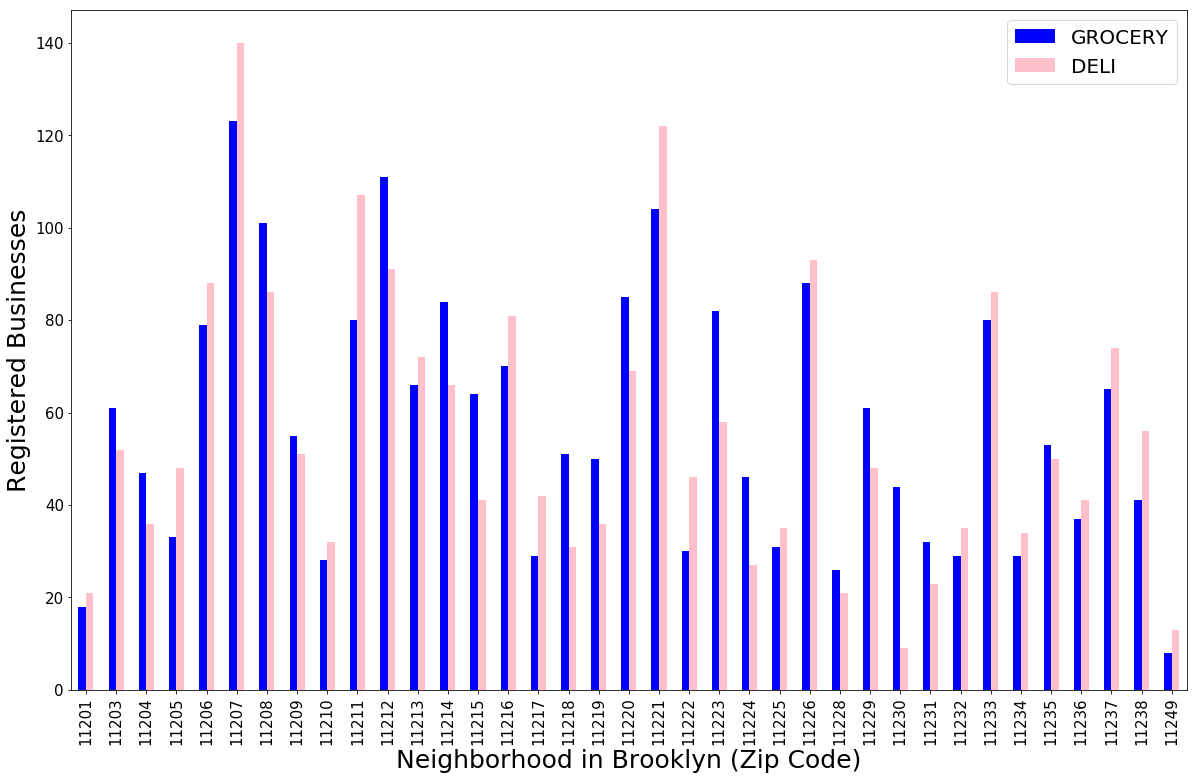

In [141]:
#merged.set_index('ZIPCODE',inplace=True)
ax=merged.plot.bar(fontsize=15, color=('blue','pink'),figsize=(20,12.5))
ax.legend(fontsize=20)
ax.set_xlabel("Neighborhood in Brooklyn (Zip Code)", fontsize=25)
ax.set_ylabel("Registered Businesses", fontsize=25)
ax.set_xticklabels(merged.index.values)
plt.show()

# Total Number of Delis & Groceries In Brooklyn Neighborhoods
This bar graph illustrates the number of delis & groceries in each neighborhood (organized by NTA Code). The total count used for this graphic was determined by selecting registered businesses in NYC with terms relating to 'Deli' or 'Grocery' in the business name; therefore the total count is not considered to be entirely inclusive or accurate. Comparing the availability of convenience stores (delis/bodegas/corner stores/etc.) to grocery stores provides a brief insight into the ease of purchasing healthy foods in these neighborhoods. 

The corresponding names to each NTA code can be found on [NYC OPEN DATA](https://data.cityofnewyork.us/City-Government/Brooklyn/722p-gmmv).

In [88]:
mergeddemo=merged.merge(zipdemo,on='ZIPCODE')
mergeddemo['Ratio']=mergeddemo['DELI']/merged['GROCERY']

Text(0.5,1,'Availability of Delis/Groceries in Brooklyn ZIPs')

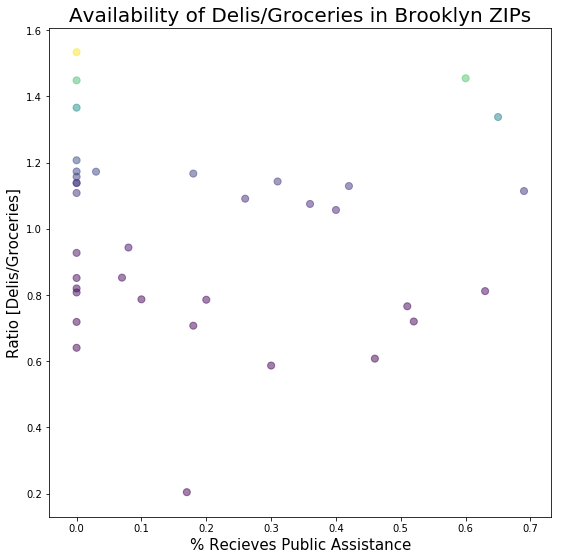

In [125]:
f, ax = plt.subplots(figsize=(9,9))
Y=mergeddemo['Ratio']
X=mergeddemo['PERCENT RECEIVES PUBLIC ASSISTANCE']
T=Y**6
ax=plt.scatter(X,Y,c=T, alpha=0.5, s=50)
plt.xlabel('% Recieves Public Assistance', size=15)
plt.ylabel('Ratio [Delis/Groceries]',size=15)
plt.title('Availability of Delis/Groceries in Brooklyn ZIPs',size=20)

In [127]:
gg=[(k, nycbiz['NTA'][k]) for k in affkeys if 'GROCERY' in nycbiz['Business Name'][k] or 'FOOD' in nycbiz['Business Name'][k] or 'PRODUCE' in nycbiz['Business Name'][k] and 'DELI' not in nycbiz['Business Name'][k]]


In [128]:
dd=[(k, nycbiz['NTA'][k]) for k in affkeys if 'DELI' in nycbiz['Business Name'][k] or 'BODEGA' in nycbiz['Business Name'][k] and 'GROCERY' not in nycbiz['Business Name'][k]]


In [129]:
dg=[(k, nycbiz['NTA'][k]) for k in affkeys if 'DELI' in nycbiz['Business Name'][k] and 'GROCERY' in nycbiz['Business Name'][k]]

In [132]:
## deli only dataframe
ddd= pd.DataFrame(dd)
ddd.rename(columns={0:'DELI',1:'NTA'}, inplace=True)
ddd=ddd.groupby(['NTA']).count().reset_index()
## grocery only dataframe
ggg= pd.DataFrame(gg)
ggg.rename(columns={0:'GROCERY',1:'NTA'}, inplace=True)
ggg=ggg.groupby(['NTA']).count().reset_index()
## deli + grocery
dgdg= pd.DataFrame(dg)
dgdg.rename(columns={0:'DELI/GROCERY',1:'NTA'}, inplace=True)
dgdg=dgdg.groupby(['NTA']).count().reset_index()
dgmerged=dgdg.merge(ddd,on='NTA').merge(ggg,on='NTA')
dgmerged=dgmerged[dgmerged.index <48]

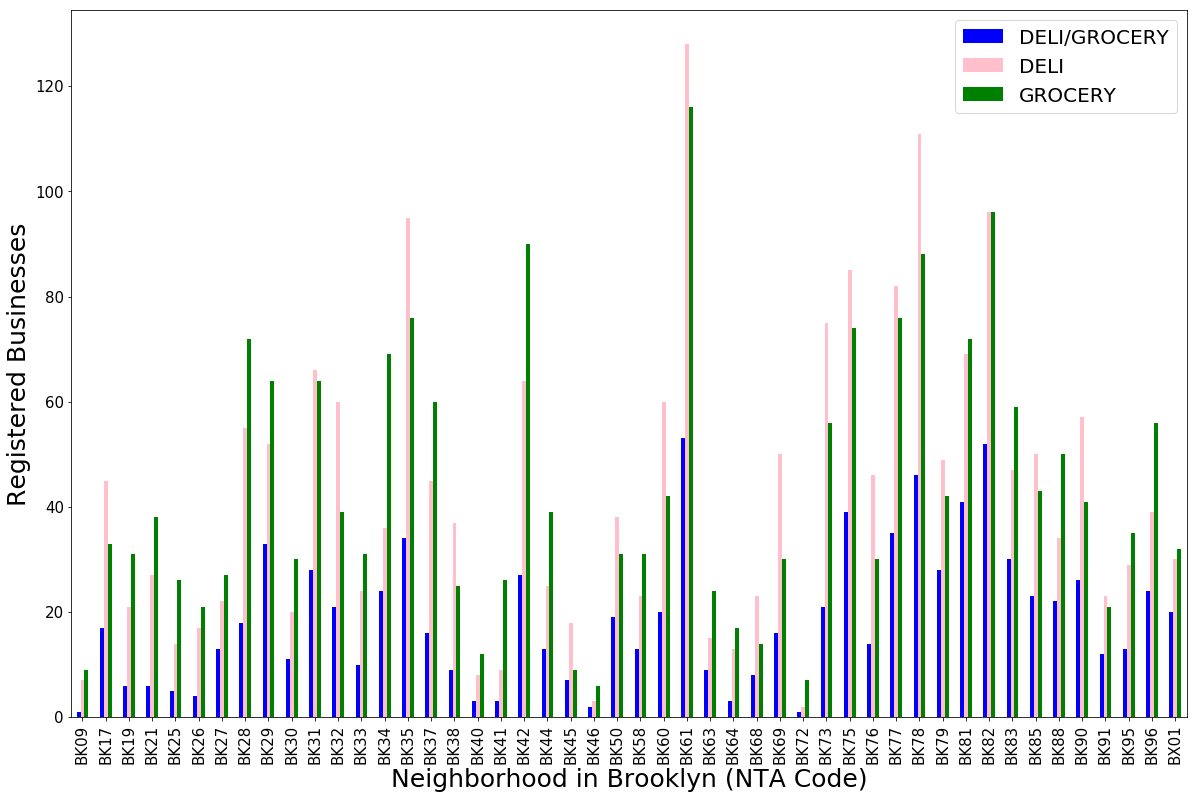

In [134]:
ax=dgmerged.plot.bar(fontsize=15, color=('blue','pink','green'),figsize=(20,13))
ax.legend(fontsize=20)
ax.set_xlabel("Neighborhood in Brooklyn (NTA Code)", fontsize=25)
ax.set_ylabel("Registered Businesses", fontsize=25)
ax.set_xticklabels(dgmerged.NTA.values)
plt.show()

## EXTRA EXTRA: PLOTTING THE RESULTS

In [31]:
## obtaining PUMA shapefile to visualize Brooklyn
! rm $PUIDATA/*geo*
url = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
urllib.request.urlretrieve(url,'PUMA.zip')
! unzip PUMA.zip -d $PUIDATA
files = ! ls $PUIDATA | grep '.shp'
shapename = files[0]
! rm PUMA.zip

rm: /Users/zoemartiniak/Documents/NYU/PUI/PUI2018/PUIdata/*geo*: No such file or directory
Archive:  PUMA.zip
  inflating: /Users/zoemartiniak/Documents/NYU/PUI/PUI2018/PUIdata/geo_export_00484277-046a-4b87-897d-c739218b5ec0.dbf  
  inflating: /Users/zoemartiniak/Documents/NYU/PUI/PUI2018/PUIdata/geo_export_00484277-046a-4b87-897d-c739218b5ec0.shp  
  inflating: /Users/zoemartiniak/Documents/NYU/PUI/PUI2018/PUIdata/geo_export_00484277-046a-4b87-897d-c739218b5ec0.shx  
  inflating: /Users/zoemartiniak/Documents/NYU/PUI/PUI2018/PUIdata/geo_export_00484277-046a-4b87-897d-c739218b5ec0.prj  


In [32]:
pumashp=gp.GeoDataFrame.from_file(os.getenv('PUIDATA') + "/" + shapename)
bk=pumashp[pumashp['boro_name']=='Brooklyn']

In [130]:
bk.rename(columns={'ntacode':'NTA'},inplace=True)

/Users/zoemartiniak/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [211]:
bkmerged=bk.merge(dgmerged,on='NTA')
bkmerged['Ratio']=bkmerged['DELI']/bkmerged['GROCERY']

In [195]:
zips=delibiz.merge(zipdemo,on='ZIPCODE')
#zips = zips[zips['COUNT PARTICIPANTS'] >0]
zips=zips.groupby(['NTA'])['PERCENT RECEIVES PUBLIC ASSISTANCE'].mean().reset_index()

In [197]:
lastmerge=bkmerged.merge(zips ,on='NTA')

In [164]:
def plot_bk(col, ax):
    """Reusable plotting wrapper."""
    bkmerged.plot(column=col, cmap='Blues',linewidth=0.0, ax=ax)

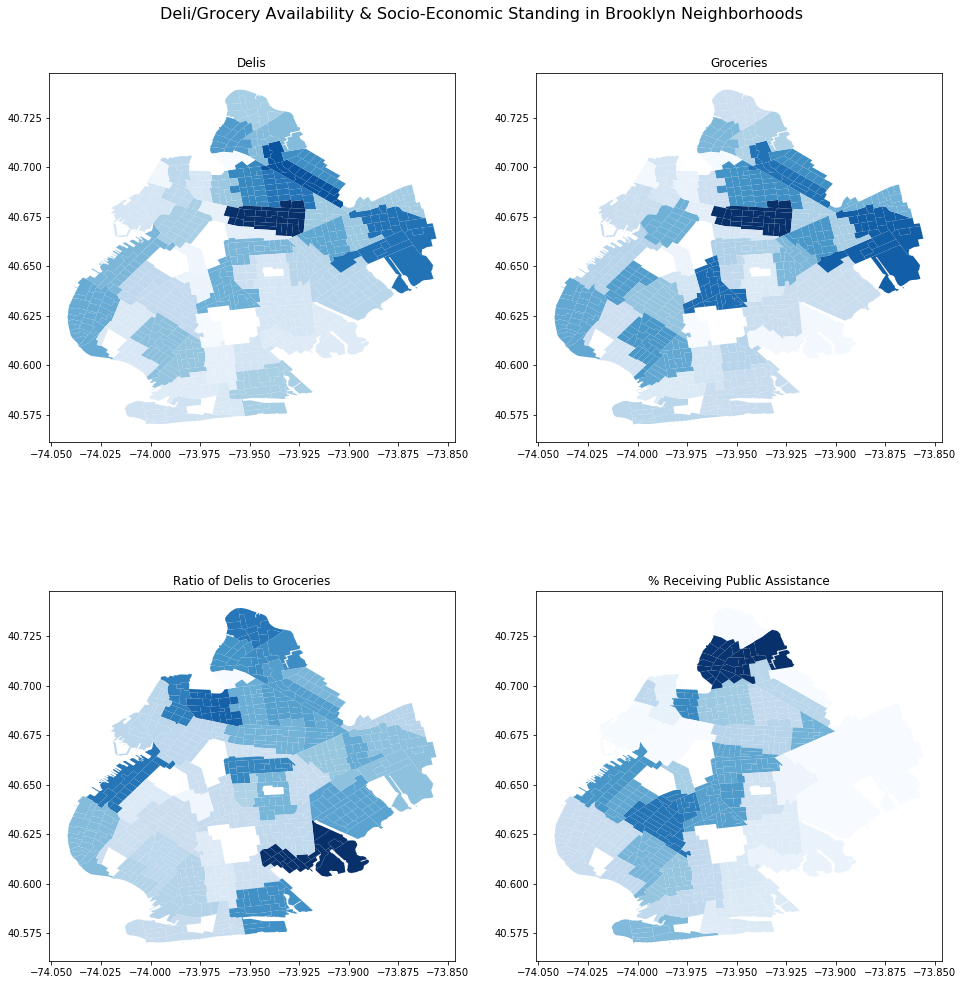

In [214]:
f, axarr = plt.subplots(2, 2, figsize=(16, 16))

plt.suptitle('Deli/Grocery Availability & Socio-Economic Standing in Brooklyn Neighborhoods', fontsize=16)
plt.subplots_adjust(top=0.95)

a0=plot_bk('DELI', axarr[0][0])
axarr[0][0].set_title('Delis')

a1=plot_bk('GROCERY', axarr[0][1])
axarr[0][1].set_title('Groceries')

a2=plot_bk('Ratio', axarr[1][0])
axarr[1][0].set_title('Ratio of Delis to Groceries')

a3=lastmerge.plot(column='PERCENT RECEIVES PUBLIC ASSISTANCE', cmap='Blues',linewidth=0.0, ax=axarr[1][1])
axarr[1][1].set_title('% Receiving Public Assistance')

plt.savefig("bk-deli-grocery.png", bbox_inches='tight')

In [ ]:
f, ax = plt.subplots(figsize=(5,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
bkmerged.plot(column='DELI',cmap='Greens',alpha=1,
                  linewidth=0.1,ax=ax, legend=True, k=10)
plt.title("Deli Count", fontsize=20);

f, ax = plt.subplots(figsize=(5,10))
bkmerged.plot(column='GROCERY',cmap='Greens',alpha=1,
                  linewidth=0.1,ax=ax, legend=True, k=10)